# 1.0 PROJECT SETUP

## 1.1 Checking Python Version

In [1]:
# Checking Python Version
from platform import python_version

print(python_version())

3.10.15


## 1.2 Installing Dependencies

In [1]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
albucore                     0.0.23
albumentations               2.0.2
annotated-types              0.7.0
anyascii                     0.3.2
asttokens                    2.4.1
astunparse                   1.6.3
audioread                    3.0.1
cachetools                   5.5.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
contractions                 0.1.73
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
filelock                     3.16.1
flatbuffers                  24.3.25
fonttools                    4.54.1
fsspec                       2024.


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1.3 Importing Dependencies

In [1]:
# Sys
import os
import sys
import gc
import random
import datetime
import time
import pickle

# Data Analysis
import numpy as np
from numpy.random import randn
from numpy.random import randint
from numpy import ones
from numpy import zeros
import pandas as pd
from PIL import Image

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Tensorflow
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.models import load_model

# Scikit-learn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Hyperparameter Tuning
import keras_tuner as kt

# Pre-Trained Models
from tensorflow.keras.applications import VGG16, ResNet50V2

# Open-CV
import cv2

# Ignore warning 
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

## 1.4 Setup GPU

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Check GPU available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1.5 Directory

In [4]:
# Models
model_names = [
    "CNN",
    "VGG",
    "ResNet",
    "GAN"
]

# Create the project directory
project_dir = "models"
tuner_dir = "keras_tuner"

os.makedirs(project_dir, exist_ok = True)
os.makedirs(tuner_dir, exist_ok = True)

# Create a subdirectory for each model
for each_model in model_names:
    model_dir = os.path.join(project_dir, each_model)
    os.makedirs(model_dir, exist_ok = True)
    # Sub-directories
    os.makedirs(os.path.join(model_dir, 'checkpoints'), exist_ok = True)
    os.makedirs(os.path.join(model_dir, 'logs'), exist_ok = True)
    os.makedirs(os.path.join(model_dir, 'saved_models'), exist_ok = True)

# Validate project directory
if os.path.exists(project_dir) and os.path.isdir(project_dir):
    print(f"{project_dir} exists and is a directory.")
    for each_model in model_names:
        model_dir = os.path.join(project_dir, each_model)
        if os.path.exists(model_dir) and os.path.isdir(model_dir):
            print(f"  - {model_dir} exists.")
        else:
            print(f"  - ERROR: {model_dir} does not exist.")
else:
    print(f"ERROR: {project_dir} does not exist or is not a directory.")

# Validate tuner directory
if os.path.exists(tuner_dir) and os.path.isdir(tuner_dir):
    print(f"{tuner_dir} exists and is a directory.")
else:
    print(f"ERROR: {tuner_dir} does not exist or is not a directory.")

models exists and is a directory.
  - models\CNN exists.
  - models\VGG exists.
  - models\ResNet exists.
  - models\GAN exists.
keras_tuner exists and is a directory.


# 2.0 DATASET

In [5]:
# Defining the Root Directory to the dataset
data_dir = "../dataset/Face/"

In [6]:
# Training Set
train_dir = os.path.join(data_dir, "train")

# Testing Set
test_dir = os.path.join(data_dir, "test")

# 3.0 EXPLORATORY DATA ANALYSIS (EDA)

## 3.1 Distributions

In [7]:
def count_imgs(directory, set_name):
    
    # Initialize an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    df = pd.DataFrame(counts, index = [set_name])
    
    return df

In [10]:
# Count the total images in taining set
train_count = count_imgs(train_dir, "train")
test_count = count_imgs(test_dir, "test")

print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3982      435  4091   7205     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


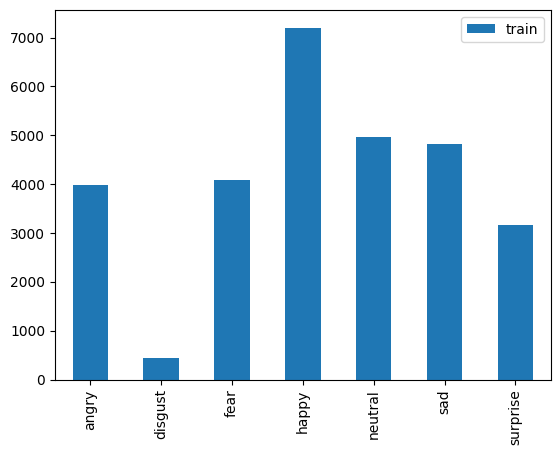

In [11]:
# Visualising Images in Training Set
train_count.transpose().plot(kind = 'bar')
plt.show()

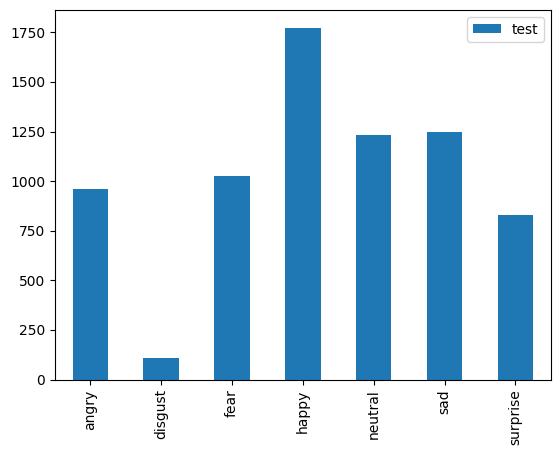

In [12]:
# Visualising Images in Testing Set
test_count.transpose().plot(kind = 'bar')
plt.show()

## 3.2 Visualising the Images

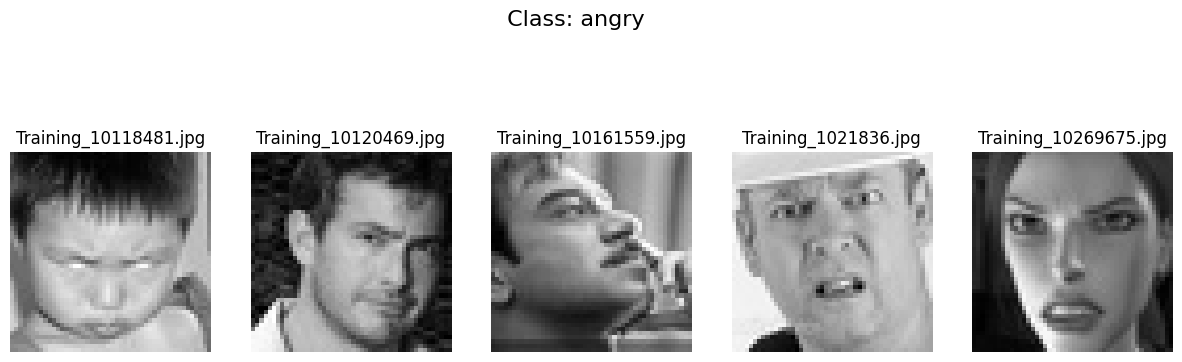

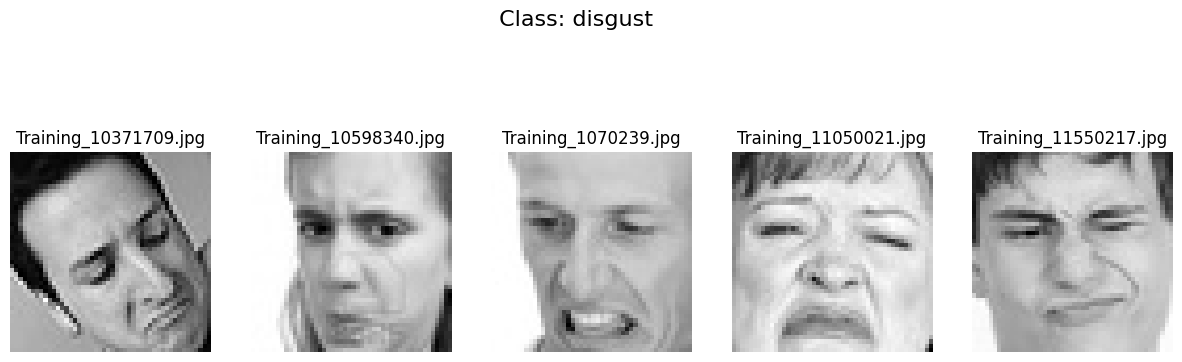

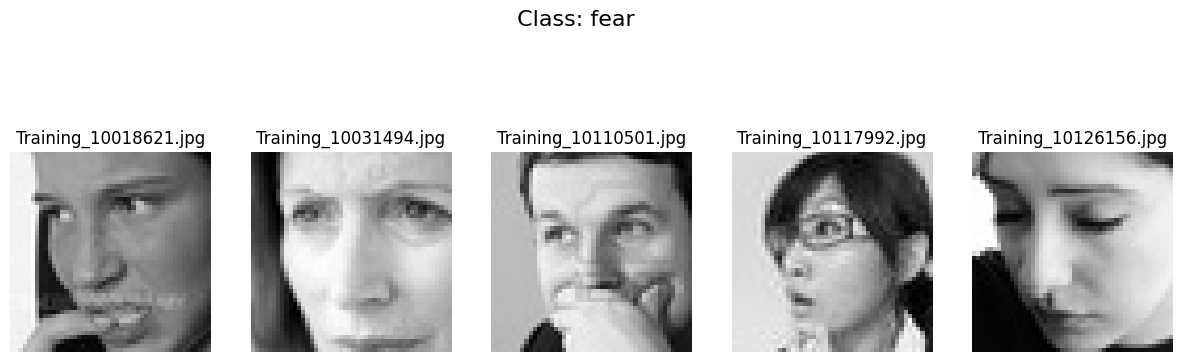

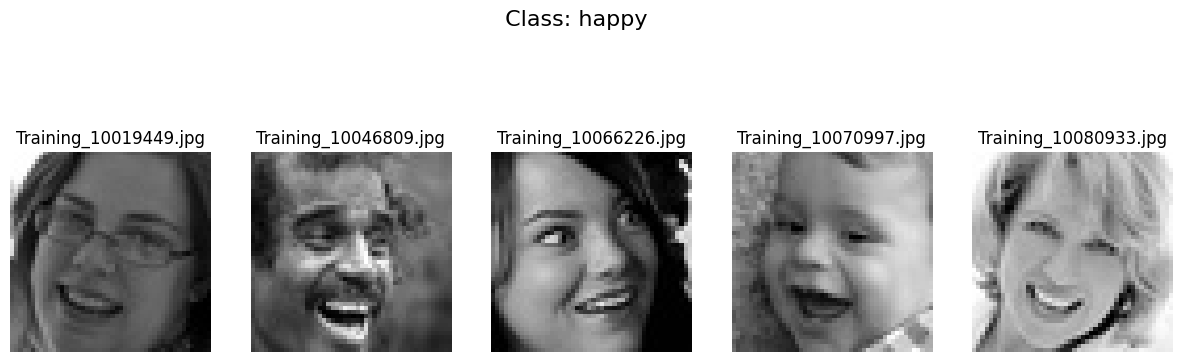

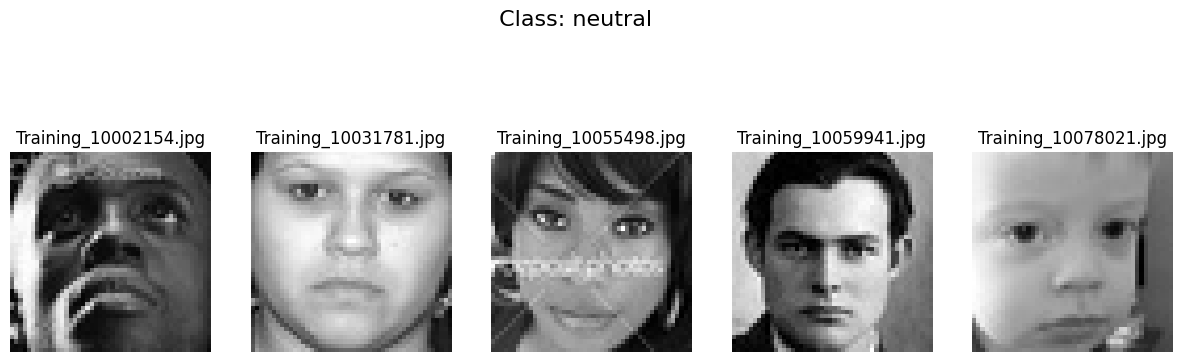

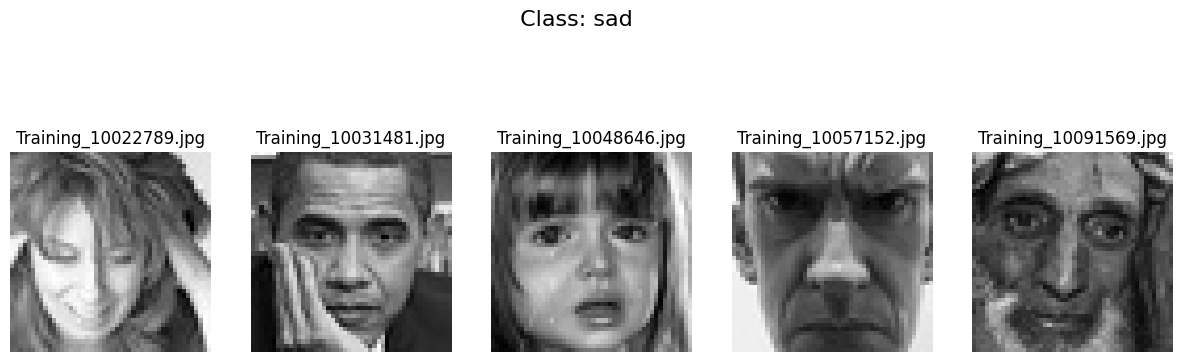

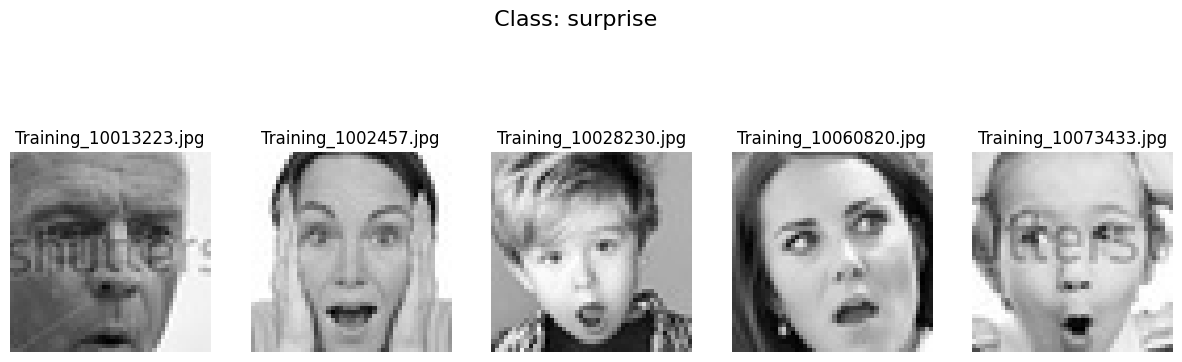

In [13]:
folders = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]

for folder in folders:
        folder_path = os.path.join(train_dir, folder)
        image_files = os.listdir(folder_path)[:5]  
        
        fig, axes = plt.subplots(1, 5, figsize = (15, 5))
        fig.suptitle(f" Class: {folder}", fontsize = 16)
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(image, cmap = 'gray')
            axes[i].axis('off')  
            axes[i].set_title(f"{image_file}")
        
        plt.show()

In [14]:
gc.collect()

60914

# 4.0 FEATURE ENGINEERING

In [7]:
# Defining Parameters
class cfg:
    IMG_WIDTH, IMG_HEIGHT = 48, 48  # Size of images
    CHANNELS = 1        
    INPUT_SHAPE = (IMG_WIDTH, IMG_HEIGHT, CHANNELS)
    NOISE_DIM = 250
    NUM_CLASSES = 7

    BATCH_SIZE = 32
    EPOCHS = 100

## 4.1 Data Augmentation

In [52]:
# Training Set
train_data_generator = ImageDataGenerator(
    rescale = 1./255,  # Rescale pixel values to 0 and 1
    rotation_range = 15,  
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True,
    validation_split = 0.1
)

# Testing Set
test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

In [10]:
# Apply to dataset
# Training Set
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (cfg.IMG_WIDTH, cfg.IMG_HEIGHT),
    batch_size = cfg.BATCH_SIZE,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
)

# Validation Set
validation_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (cfg.IMG_WIDTH, cfg.IMG_HEIGHT),
    batch_size = cfg.BATCH_SIZE,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
)

# Testing Set
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size = (cfg.IMG_WIDTH, cfg.IMG_HEIGHT),
    batch_size = cfg.BATCH_SIZE,
    color_mode = "grayscale",
    class_mode = "categorical",
    shuffle = False
)

Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


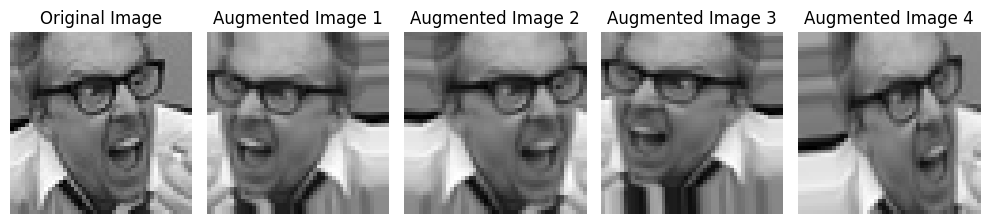

In [10]:
# Path to your specific image
image_path = "../dataset/Face/train/angry/Training_3908.jpg"

# Load and convert the image to an array
img = load_img(image_path, color_mode = 'grayscale', target_size = (cfg.IMG_WIDTH, cfg.IMG_HEIGHT))  # Adjust color_mode if necessary
img_array = img_to_array(img)  # Converts the image to a numpy array
img_array = img_array.reshape((1,) + img_array.shape)  # Reshapes the image to (1, width, height, channels) for the generator

# Setting up the plot
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 4))
# Plot the original image first. Since img_array is a 3D array after reshaping, we use [:, :, 0]
axes[0].imshow(img_array[0, :, :, 0], cmap = 'gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Generate and plot augmented images
for i, ax in enumerate(axes.flat[1:]):  # Start from the second subplot
    
    # Generate a batch of augmented images
    aug_iter = train_data_generator.flow(img_array, batch_size = 1)
    aug_img = next(aug_iter)[0]  # Get the first augmented image from the batch

    # Plot the augmented image. We directly use [:, :, 0] without an initial batch index
    ax.imshow(aug_img[:, :, 0], cmap = 'gray')
    ax.set_title(f'Augmented Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 4.2 GAN to Generate Synthetic Data

### 4.2.1 Fetching Sample Images

In [22]:
# Fetch images of the "disgust" class
disgust_class_index = train_generator.class_indices['disgust']
disgust_images = []

for batch, labels in train_generator:
    for img, label in zip(batch, labels):
        if np.argmax(label) == disgust_class_index:
            disgust_images.append(img)
    if len(disgust_images) >= 500:  # Fetch up to 500 images
        break

disgust_images = np.array(disgust_images)
print(f"Collected {disgust_images.shape[0]} images for the 'disgust' class.")

Collected 500 images for the 'disgust' class.


### 4.2.2 Building GAN Model

In [23]:
def make_generator_model(latent_dim):

    L1 = 128
    n_nodes = 256 * 3 * 3
    
    gan_generator = tf.keras.Sequential([

        # foundation for 4x4 image
        L.Dense(n_nodes, input_dim = latent_dim),
        L.LeakyReLU(alpha = 0.2),
        L.Reshape((3, 3, 256)),

        # upsample to 8x8
        L.Conv2DTranspose(L1, (4, 4), strides = (2, 2), padding = "same", use_bias = False),
        L.LeakyReLU(alpha = 0.2),
        
        # upsample to 16x16
        L.Conv2DTranspose(L1, (4, 4), strides = (2, 2), padding = "same", use_bias = False),
        L.LeakyReLU(alpha = 0.2),

        # upsample to 32x32
        L.Conv2DTranspose(L1, (4, 4), strides = (2, 2), padding = "same", use_bias = False),
        L.LeakyReLU(alpha = 0.2),

        # Output Layer
        L.Conv2DTranspose(1, (3, 3), strides = (2, 2), padding = "same", use_bias = False, activation = "tanh"),
    
    ])
    
    return gan_generator

In [24]:
def make_discriminator_model():

    L1 = 64
    L2 = 128
    L3 = 256
    
    gan_discriminator = tf.keras.Sequential([
        L.Conv2D(L1, kernel_size = (3, 3), strides = (2, 2), padding = "same", input_shape = cfg.INPUT_SHAPE),
        L.LeakyReLU(alpha = 0.2),
        L.Dropout(0.3),
        
        L.Conv2D(L2, kernel_size = (3, 3), strides = (2, 2), padding = "same"),
        L.LeakyReLU(alpha = 0.2),
        L.Dropout(0.3),

        L.Conv2D(L2, kernel_size = (3, 3), strides = (2, 2), padding = "same"),
        L.LeakyReLU(alpha = 0.2),
        L.Dropout(0.3),

        L.Conv2D(L3, kernel_size = (3, 3), strides = (2, 2), padding = "same"),
        L.LeakyReLU(alpha = 0.2),
        L.Dropout(0.3),

        L.Flatten(),
        L.Dropout(0.3),
        L.Dense(1, activation = "sigmoid")
    ])

    # Compile Model
    opt = tf.keras.optimizers.Adam(lr = 0.0002, beta_1 = 0.5)
    gan_discriminator.compile(
        loss = "binary_crossentropy",
        optimizer = opt,
        metrics = ["accuracy"]
    )

    return gan_discriminator

In [25]:
def make_gan_model(generator, discriminator):

    # Make weights in the discriminator not trainable
    discriminator.trainable = False

    # Build Gan Model
    gan_model = tf.keras.Sequential()
    gan_model.add(generator)
    gan_model.add(discriminator)

    # Compile Model
    opt = tf.keras.optimizers.Adam(lr = 0.0002, beta_1 = 0.5)
    gan_model.compile(
        loss = "binary_crossentropy",
        optimizer = opt
    )

    return gan_model

In [26]:
def train_gan(generator, discriminator, gan, real_images, epochs = 1000, batch_size = 32):
    for epoch in range(epochs):
        # Create random noise and generate fake images
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)

        # Select a random batch of real images
        idx = np.random.randint(0, real_images.shape[0], batch_size)
        real_batch = real_images[idx]

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_batch, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator via GAN
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

In [27]:
generator = make_generator_model(100)
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2304)              232704    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2304)              0         
                                                                 
 reshape (Reshape)           (None, 3, 3, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 6, 6, 128)        524288    
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6, 6, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 12, 12, 128)      262144    
 ranspose)                                              

In [28]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        640       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 12, 12, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)        

In [29]:
gan = make_gan_model(generator, discriminator)
gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 48, 48, 1)         1282432   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 519553    
                                                                 
Total params: 1,801,985
Trainable params: 1,282,432
Non-trainable params: 519,553
_________________________________________________________________


In [30]:
def load_real_samples():
    trainX = np.empty([0, 48, 48, 1])
    
    # Load in the images
    for filepath in os.listdir('../dataset/Face/train/disgust'):
        img = cv2.imread('../dataset/Face/train/disgust/{0}'.format(filepath),0)
        img = img.reshape(1, 48, 48, 1)
        trainX = (np.concatenate((trainX, img)))
    
    X = trainX.astype('float32')
    
    # scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    return X

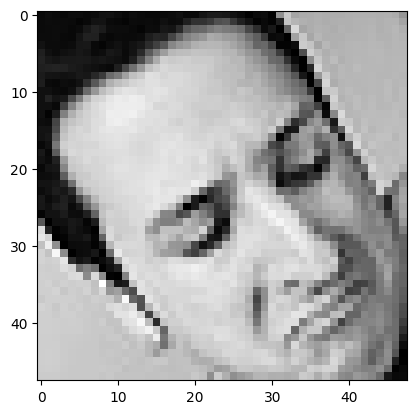

In [31]:
dataset = load_real_samples() # (50000, 32, 32, 3)
dataset.shape
plt.imshow(255-dataset[0], cmap = 'Greys')
plt.show()

In [32]:
# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    
    return X, y

In [33]:
X_real, y_real = generate_real_samples(dataset, 150)

In [34]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    
    return x_input

In [35]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    
    # predict outputs
    X = g_model.predict(x_input)
    
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    
    return X, y

In [36]:
# create and save a plot of generated images
def save_plot(examples, epoch, n = 7):
    
    # scale from [-1,1] to [0,1]
    examples = (examples + 1) / 2.0
    
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i])

    # Ensure the directory is created
    output_dir = os.path.join(data_dir, "gan_output")
    os.makedirs(output_dir, exist_ok = True)
    
    # save plot to file
    filename = os.path.join(output_dir, f'generated_plot_e{epoch+1:03d}.png')
    plt.savefig(filename)
    plt.close()

In [37]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples = 150):
    
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    
    # save plot
    save_plot(x_fake, epoch)

    # Ensure the directory is created
    gan_dir = "models/GANs_Data_Generation/saved_models"
    os.makedirs(gan_dir, exist_ok = True)
    
    # save the generator model tile file
    filename = os.path.join(gan_dir, f'generator_model_%03d.h5' % (epoch+1))
    g_model.save(filename)

In [38]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs = 200, n_batch = 128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        
        # evaluate the model performance, sometimes
        if (i + 1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [39]:
# size of the latent space
latent_dim = 100

# load image data
dataset = load_real_samples()

# train model
train(generator, discriminator, gan, dataset, latent_dim)

2/2 [==============================] - 0s 4ms/step
>1, 1/3, d1=0.691, d2=0.695 g=0.692
2/2 [==============================] - 0s 3ms/step
>1, 2/3, d1=0.657, d2=0.696 g=0.691
2/2 [==============================] - 0s 4ms/step
>1, 3/3, d1=0.618, d2=0.697 g=0.690
2/2 [==============================] - 0s 3ms/step
>2, 1/3, d1=0.562, d2=0.702 g=0.686
2/2 [==============================] - 0s 5ms/step
>2, 2/3, d1=0.497, d2=0.712 g=0.676
2/2 [==============================] - 0s 4ms/step
>2, 3/3, d1=0.426, d2=0.739 g=0.655
2/2 [==============================] - 0s 4ms/step
>3, 1/3, d1=0.306, d2=0.797 g=0.614
2/2 [==============================] - 0s 3ms/step
>3, 2/3, d1=0.226, d2=0.897 g=0.571
2/2 [==============================] - 0s 4ms/step
>3, 3/3, d1=0.198, d2=0.964 g=0.558
2/2 [==============================] - 0s 3ms/step
>4, 1/3, d1=0.165, d2=0.954 g=0.582
2/2 [==============================] - 0s 5ms/step
>4, 2/3, d1=0.182, d2=0.890 g=0.643
2/2 [==============================] - 0s 4

In [40]:
gc.collect()

1918659

### 4.2.3 Generate Images Using GAN

In [41]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    
    x_input = x_input.reshape(n_samples, latent_dim)
   
    return x_input

In [42]:
# Function to generate and save images
def generate_and_save_images(generator_model, latent_dim, num_images, output_dir):
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Generate latent points
    latent_points = generate_latent_points(latent_dim, num_images)

    # Generate images
    generated_images = generator_model.predict(latent_points)

    # Scale images from [-1,1] to [0,255]
    generated_images = (generated_images + 1) * 127.5
    generated_images = generated_images.astype(np.uint8)

    # Save each image
    for i, img_array in enumerate(generated_images):
        # Convert to grayscale (if needed) and save the image
        img = Image.fromarray(img_array.squeeze(), mode='L')  # Assuming grayscale
        img.save(os.path.join(output_dir, f"generated_image_{i + 1}.png"))

    print(f"{num_images} images have been generated and saved to {output_dir}.")

In [43]:
if True:
    # load model
    gan_dir = "models/GANs_Data_Generation/saved_models/generator_model_200.h5"
    model = load_model(gan_dir)

    # Define Parameters
    latent_dim = 100
    num_images = 2000
    output_directory = "../dataset/Face/train/disgust"

    # Generate and save 1000 images
    generate_and_save_images(model, latent_dim, num_images, output_directory)

63/63 [==============================] - 1s 8ms/step
2000 images have been generated and saved to ../dataset/Face/train/disgust.


In [44]:
# Count the total images in taining set
train_count = count_imgs(train_dir, "train")
test_count = count_imgs(test_dir, "test")

print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3982     2435  4091   7205     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


In [45]:
# Update the dataset
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (cfg.IMG_WIDTH, cfg.IMG_HEIGHT),
    batch_size = cfg.BATCH_SIZE,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

Found 24544 images belonging to 7 classes.


In [46]:
gc.collect()

186

## 4.3 Class Weights

In [23]:
# Define Class Labels
class_indices = train_generator.class_indices
class_labels = list(class_indices.values())
print(class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [24]:
# Compute Class Weights
class_weights = compute_class_weight(
    class_weight = 'balanced',
    classes = np.array(class_labels),
    y = train_generator.classes
)

# Convert to Dict
class_weights = dict(enumerate(class_weights))
class_weights

{0: 1.0266046844269623,
 1: 9.406618610747051,
 2: 1.0010460615781582,
 3: 0.5684387684387684,
 4: 0.8260394187886635,
 5: 0.8491274770777877,
 6: 1.293372978330405}

# 5.0 MODELLING

In [20]:
# Save Model Checkpoint
def get_checkpoint_callback(model_path, model_name):
    
    # Create a directory for saving checkpoints
    model_name = model_name
    chk_point_dir = os.path.join(model_path, "checkpoints")
    os.makedirs(chk_point_dir, exist_ok = True)

    # Add a timestamp for uniqueness
    timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    filepath = os.path.join(chk_point_dir, f"{model_name}_{timestamp}_checkpoint.h5")

    # Return a ModelCheckpoint callback with the generated filepath
    return ModelCheckpoint(
        filepath = filepath,
        save_best_only = True,
        verbose = 1,
        mode = "max",
        monitor = "val_accuracy"
)

In [14]:
# Early Stopping
early_stopping = EarlyStopping(
    restore_best_weights = True,
    # min_delta = 0,  # Min change in the monitored quantity to qualify as an improvement
    patience = 25,  # Number of epochs with no improvement
    verbose = 1, 
    monitor = "val_loss"
)

# RLRP
rlrp = ReduceLROnPlateau(
    factor = 0.001,  # Factor by which LR will be reduced
    patience = 10,
    verbose = 1,
    # mode = "auto",
    min_delta = 0.0001,
    monitor = "val_loss"
)

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [18]:
train_steps_per_epoch = train_generator.n // train_generator.batch_size + 1
test_steps_epoch = test_generator.n // test_generator.batch_size + 1

## 5.1 Baseline CNN Model

In [17]:
# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

In [18]:
# Defining Number of Neurons
L1 = 64
L2 = 128
L3 = 256
L4 = 512
L5 = 1024

# Building CNN Model
base_cnn_model = models.Sequential([

    # Input Layer (CNN 1)
    L.Conv2D(L1, kernel_size = (3, 3), padding = "same", input_shape = cfg.INPUT_SHAPE, activation = "relu"),
    L.BatchNormalization(),
    L.MaxPooling2D(pool_size = (2, 2)),
    L.Dropout(0.25),

    # First Hidden Layer (CNN 2)
    L.Conv2D(L2, kernel_size = (5, 5), padding = "same", activation = "relu"),
    L.BatchNormalization(),
    L.MaxPooling2D(pool_size = (2, 2)),
    L.Dropout(0.25),

    # Second Hidden Layer (CNN 3)
    L.Conv2D(L4, kernel_size = (3, 3), padding = "same", activation = "relu"),
    L.BatchNormalization(),
    L.MaxPooling2D(pool_size = (2, 2)),
    L.Dropout(0.25),

    # Third Hidden Layer (CNN 4)
    L.Conv2D(L4, kernel_size = (3, 3), padding = "same", activation = "relu"),
    L.BatchNormalization(),
    L.MaxPooling2D(pool_size = (2, 2)),
    L.Dropout(0.25),

    # Fourth Hidden Layer (CNN 5)
    L.Conv2D(L5, kernel_size = (3, 3), padding = "same", activation = "relu"),
    L.BatchNormalization(),
    L.MaxPooling2D(pool_size = (2, 2)),
    L.Dropout(0.25),

    # Global Average Pooling
    L.GlobalAveragePooling2D(),

    # Fully Connected Layers
    L.Dense(L5, activation = "relu", kernel_initializer = "he_normal"),
    L.BatchNormalization(),
    L.Dropout(0.5),

    L.Dense(L4, activation = "relu", kernel_initializer = "he_normal"),
    L.BatchNormalization(),
    L.Dropout(0.5),

    L.Dense(L3, activation = "relu", kernel_initializer = "he_normal"),
    L.BatchNormalization(),
    L.Dropout(0.5),

    # Output Layer
    L.Dense(7, activation = "softmax", kernel_initializer = "he_normal")
])

# View Model Summary
base_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [38]:
# Define Model Path
model_name = "CNN"
model_path = os.path.join("models", model_name)

# Define Checkpoint Path
chk_point = get_checkpoint_callback(model_path, model_name)

# Define CSV Path
csv_logger = CSVLogger(os.path.join(model_path, "logs/training_log.csv"))

In [20]:
# Train the CNN Model
base_cnn_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer, 
    metrics = ['accuracy']
)

In [21]:
# Define Callbacks
callbacks = [chk_point, early_stopping, rlrp, csv_logger]

# train the model
base_cnn_history = base_cnn_model.fit(
    train_generator,
    epochs = 300,
    validation_data = validation_generator,
    callbacks = callbacks
)

Epoch 1/300
808/808 [==============================] - ETA: 0s - loss: 2.9212 - accuracy: 0.1637
Epoch 1: val_accuracy improved from -inf to 0.24686, saving model to models\CNN\checkpoints\CNN_20250208-192009_checkpoint.h5
808/808 [==============================] - 41s 43ms/step - loss: 2.9212 - accuracy: 0.1637 - val_loss: 2.0543 - val_accuracy: 0.2469 - lr: 1.0000e-04
Epoch 2/300
808/808 [==============================] - ETA: 0s - loss: 2.5269 - accuracy: 0.1794
Epoch 2: val_accuracy improved from 0.24686 to 0.25035, saving model to models\CNN\checkpoints\CNN_20250208-192009_checkpoint.h5
808/808 [==============================] - 34s 43ms/step - loss: 2.5269 - accuracy: 0.1794 - val_loss: 1.9316 - val_accuracy: 0.2503 - lr: 1.0000e-04
Epoch 3/300
807/808 [============================>.] - ETA: 0s - loss: 2.3101 - accuracy: 0.1909
Epoch 3: val_accuracy improved from 0.25035 to 0.25244, saving model to models\CNN\checkpoints\CNN_20250208-192009_checkpoint.h5
808/808 [================

# 6.0 PRE-TRAINED MODELS

In [8]:
class cfg_pre:
    IMG_WIDTH, IMG_HEIGHT = 224, 224
    CHANNEL = 3
    INPUT_SHAPE = (IMG_WIDTH, IMG_HEIGHT, CHANNEL)

    BATCH_SIZE = 64
    EPOCHS = 100
    NUM_CLASSES = 7

In [9]:
# Training Set
train_data_generator = ImageDataGenerator(
    rescale = 1./255,  # Rescale pixel values to 0 and 1
    rotation_range = 10,  
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,                                        
    fill_mode = 'nearest'
)

# Testing Set
test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

In [10]:
# Automatically retrieve images and their classes for train and validation sets
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (cfg_pre.IMG_WIDTH, cfg_pre.IMG_HEIGHT),
    class_mode = "categorical",
    color_mode = 'rgb',
    shuffle = True,
    batch_size = cfg_pre.BATCH_SIZE,
    subset = "training"
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size = (cfg_pre.IMG_WIDTH, cfg_pre.IMG_HEIGHT),
    class_mode = "categorical",
    color_mode = 'rgb',
    shuffle = False,
    batch_size = cfg_pre.BATCH_SIZE
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
train_steps_per_epoch = train_generator.n // train_generator.batch_size + 1
test_steps_epoch = test_generator.n // test_generator.batch_size + 1

In [18]:
# Early Stopping
early_stopping = EarlyStopping(
    restore_best_weights = True,
    # min_delta = 0,  # Min change in the monitored quantity to qualify as an improvement
    patience = 8,  # Number of epochs with no improvement
    verbose = 1, 
    monitor = "val_loss"
)

# RLRP
rlrp = ReduceLROnPlateau(
    factor = 0.001,  # Factor by which LR will be reduced
    patience = 5,
    verbose = 1,
    # mode = "auto",
    min_delta = 0.0001,
    monitor = "val_loss"
)

## 6.1 VGG16 Model

In [13]:
# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

In [15]:
# Load the VGG16 base model, excluding its top (fully connected) layers
vgg = VGG16(input_shape = cfg_pre.INPUT_SHAPE, include_top = False, weights = "imagenet")

# Make the specified layers non-trainable
for layer in vgg.layers[:-3]:
    layer.trainable = False

# Model Summary
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
# Define Number of Neurons
L1 = 1024
L2 = 512

# Input Layer
x = L.Flatten()(vgg.output)

# Adding a fully connected layer with ReLU activation and He normal initializer
x = L.Dense(L1, activation = "relu", kernel_initializer = "he_uniform")(x)
x = L.Dropout(0.3)(x)  # Adding dropout for regularization

x = L.Dense(L2, activation = "relu", kernel_initializer = "he_uniform")(x)
x = L.Dropout(0.3)(x)  # Adding dropout for regularization

# Adding the output layer with softmax activation
output = L.Dense(cfg_pre.NUM_CLASSES, activation = "softmax", kernel_initializer = "he_uniform")(x)

# Creating the model
base_vgg_model = tf.keras.Model(inputs = vgg.input, outputs = output)

# Compile the model
base_vgg_model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False),
    metrics = ['accuracy']
)

# Model summary to see all layers
base_vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# Define Model Path
model_name = "VGG"
model_path = os.path.join("models", model_name)

# Define Checkpoint Path
chk_point = get_checkpoint_callback(model_path, model_name)

# Define CSV Path
csv_logger = CSVLogger(os.path.join(model_path, "logs/training_log.csv"))

In [25]:
callbacks = [chk_point, early_stopping, rlrp, csv_logger]

base_vgg_history = base_vgg_model.fit(
    train_generator,
    steps_per_epoch = train_steps_per_epoch,
    validation_data = test_generator,
    validation_steps = test_steps_epoch,
    epochs = cfg_pre.EPOCHS,
    class_weight = class_weights,
    callbacks = callbacks
)

Epoch 1/100
449/449 [==============================] - ETA: 0s - loss: 1.9683 - accuracy: 0.1198
Epoch 1: val_accuracy improved from -inf to 0.13346, saving model to models\VGG\checkpoints\VGG_20250209-213702_checkpoint.h5
449/449 [==============================] - 521s 1s/step - loss: 1.9683 - accuracy: 0.1198 - val_loss: 1.9484 - val_accuracy: 0.1335 - lr: 0.0010
Epoch 2/100
449/449 [==============================] - ETA: 0s - loss: 1.9463 - accuracy: 0.0990
Epoch 2: val_accuracy did not improve from 0.13346
449/449 [==============================] - 323s 718ms/step - loss: 1.9463 - accuracy: 0.0990 - val_loss: 1.9472 - val_accuracy: 0.0155 - lr: 0.0010
Epoch 3/100
449/449 [==============================] - ETA: 0s - loss: 1.9462 - accuracy: 0.0845
Epoch 3: val_accuracy improved from 0.13346 to 0.24714, saving model to models\VGG\checkpoints\VGG_20250209-213702_checkpoint.h5
449/449 [==============================] - 346s 770ms/step - loss: 1.9462 - accuracy: 0.0845 - val_loss: 1.944

## 6.3 ResNet50v2

In [14]:
# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

In [17]:
# Load the VGG16 base model, excluding its top (fully connected) layers
res = ResNet50V2(input_shape = cfg_pre.INPUT_SHAPE, include_top = False, weights = 'imagenet')

for layer in res.layers[:-50]:
    layer.trainable = False

res.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [39]:
# Define Neurons
L1 = 64

# Building Base ResNet
x = res.output
x = L.Dropout(0.25)(x)
x = L.BatchNormalization()(x)

# Flatten Layer
x = L.Flatten()(x)

x = L.Dense(L1, activation = "relu")(x)
x = L.BatchNormalization()(x)
x = L.Dropout(0.5)(x)

# Output
output = L.Dense(cfg_pre.NUM_CLASSES, activation = "softmax", name = "output")(x)

# Creating the model
base_res_model = tf.keras.Model(inputs = res.input, outputs = output)

# Compiling the model
base_res_model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

# Model Summary
base_res_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [20]:
def Create_ResNet50V2_Model():

    model = tf.keras.Sequential([
                      res,
                      L.Dropout(.25),
                      L.BatchNormalization(),
                      L.Flatten(),
                      L.Dense(64, activation = 'relu'),
                      L.BatchNormalization(),
                      L.Dropout(.5),
                      L.Dense(7,activation = 'softmax')
                    ])
    return model

In [21]:
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [25]:
# Define Model Path
model_name = "ResNet"
model_path = os.path.join("models", model_name)

# Define Checkpoint Path
chk_point = get_checkpoint_callback(model_path, model_name)

# Define CSV Path
csv_logger = CSVLogger(os.path.join(model_path, "logs/training_log.csv"))

In [26]:
callbacks = [chk_point, early_stopping, rlrp, csv_logger]

base_res_history = ResNet50V2_Model.fit(
    train_generator,
    steps_per_epoch = train_steps_per_epoch,
    validation_data = test_generator,
    validation_steps = test_steps_epoch,
    epochs = cfg_pre.EPOCHS,
    class_weight = class_weights,
    callbacks = callbacks
)

Epoch 1/100
448/448 [==============================] - ETA: 0s - loss: 1.7437 - accuracy: 0.3695
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to models\ResNet\checkpoints\ResNet_20250208-032256_checkpoint.h5
448/448 [==============================] - 568s 1s/step - loss: 1.7437 - accuracy: 0.3695 - val_loss: 1.4077 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
448/448 [==============================] - ETA: 0s - loss: 1.4325 - accuracy: 0.4716
Epoch 2: val_accuracy improved from 0.50000 to 0.52539, saving model to models\ResNet\checkpoints\ResNet_20250208-032256_checkpoint.h5
448/448 [==============================] - 322s 718ms/step - loss: 1.4325 - accuracy: 0.4716 - val_loss: 1.9189 - val_accuracy: 0.5254 - lr: 0.0010
Epoch 3/100
448/448 [==============================] - ETA: 0s - loss: 1.3340 - accuracy: 0.5112
Epoch 3: val_accuracy did not improve from 0.52539
448/448 [==============================] - 313s 698ms/step - loss: 1.3340 - accuracy: 0.5112 - val

# 6.0 HYPERPARAMETER TUNING

In [45]:
# Early Stopping
early_stopping = EarlyStopping(
    restore_best_weights = True,
    # min_delta = 0,  # Min change in the monitored quantity to qualify as an improvement
    patience = 8,  # Number of epochs with no improvement
    verbose = 1, 
    monitor = "val_loss"
)

# RLRP
rlrp = ReduceLROnPlateau(
    factor = 0.001,  # Factor by which LR will be reduced
    patience = 5,
    verbose = 1,
    # mode = "auto",
    min_delta = 0.0001,
    monitor = "val_loss"
)

## 6.1 CNN Model

In [15]:
def build_cnn(hp):

    # Define Hyperparameters
    L1 = hp.Choice("L1", [64, 128])
    L2 = hp.Choice("L2", [128, 256])
    L3 = hp.Choice("L3", [256, 512])
    L4 = hp.Choice("L4", [512, 1024])

    # Dropout Rate
    dropout_rate = hp.Choice("dropout_rate", [0.3, 0.4, 0.5])
    
    # Learning Rate and Optimizer Choice
    learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    optimizer_choice = hp.Choice("optimizer", values = ["adam", "sgd", "rmsprop"])

    # Building the Model
    tuned_cnn_model = models.Sequential([
        
        # CNN 1
        L.Conv2D(L1, kernel_size = (3, 3), padding = "same", input_shape = cfg.INPUT_SHAPE, activation = "relu"),
        L.BatchNormalization(),
        L.MaxPooling2D(pool_size = (2, 2)),
        L.Dropout(dropout_rate),

        # CNN 2
        L.Conv2D(L2, kernel_size = (5, 5), padding = "same", activation = "relu"),
        L.BatchNormalization(),
        L.MaxPooling2D(pool_size = (2, 2)),
        L.Dropout(dropout_rate),

        # CNN 3
        L.Conv2D(L3, kernel_size = (3, 3), padding = "same", activation = "relu"),
        L.BatchNormalization(),
        L.MaxPooling2D(pool_size = (2, 2)),
        L.Dropout(dropout_rate),

        # CNN 4
        L.Conv2D(L4, kernel_size = (3, 3), padding = "same", activation = "relu"),
        L.BatchNormalization(),
        L.MaxPooling2D(pool_size = (2, 2)),
        L.Dropout(dropout_rate),

        # CNN 5
        L.Conv2D(L4, kernel_size = (3, 3), padding = "same", activation = "relu"),
        L.BatchNormalization(),
        L.MaxPooling2D(pool_size = (2, 2)),
        L.Dropout(dropout_rate),

        # Global Average Pooling
        L.GlobalAveragePooling2D(),

        # Fully Connected Layers
        L.Dense(L4, activation = "relu", kernel_initializer = "he_normal"),
        L.BatchNormalization(),
        L.Dropout(dropout_rate),

        L.Dense(L3, activation = "relu", kernel_initializer = "he_normal"),
        L.BatchNormalization(),
        L.Dropout(dropout_rate),

        L.Dense(L2, activation = "relu", kernel_initializer = "he_normal"),
        L.BatchNormalization(),
        L.Dropout(dropout_rate),

        # Output Layer
        L.Dense(cfg.NUM_CLASSES, activation = "softmax", kernel_initializer = "he_normal")
    ])

    # Define Optimizer
    if optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum = 0.9)
    elif optimizer_choice == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate = learning_rate)

    # Compile Model
    tuned_cnn_model.compile(
        optimizer = optimizer,
        loss = "categorical_crossentropy",
        metrics = ["accuracy"]
    )

    return tuned_cnn_model

In [16]:
cnn_tuner = kt.Hyperband(
    build_cnn,
    objective = "val_accuracy",
    max_epochs = 50,
    factor = 3,
    directory = "./keras_tuner",
    project_name = "TUNE_BASE_CNN_FER",
)

In [19]:
cnn_tuner.search(
    train_generator,
    steps_per_epoch = train_steps_per_epoch,
    epochs = cfg.EPOCHS,
    validation_data = validation_generator, 
    callbacks = [early_stopping, rlrp]
)

Trial 90 Complete [00h 26m 46s]
val_accuracy: 0.6349372267723083

Best val_accuracy So Far: 0.6349372267723083
Total elapsed time: 08h 41m 28s


In [20]:
# Check the model summary of the best model
tuned_cnn_model = cnn_tuner.get_best_models()[0]
tuned_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       409856    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 256)      1

In [23]:
tuned_cnn_hp = cnn_tuner.get_best_hyperparameters(num_trials = 1)
tuned_cnn_hp = tuned_cnn_hp[0]
tuned_cnn_hp.values

{'L1': 64,
 'L2': 256,
 'L3': 512,
 'L4': 1024,
 'dropout_rate': 0.3,
 'learning_rate': 0.001,
 'optimizer': 'rmsprop',
 'tuner/epochs': 50,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [25]:
# Define Callbacks
callbacks = [early_stopping, rlrp]

# Rerun the best CNN Model
tuned_cnn_history = tuned_cnn_model.fit(
    train_generator,
    steps_per_epoch = train_steps_per_epoch,
    epochs = 300,
    validation_data = validation_generator,
    class_weight = class_weights,
    callbacks = callbacks
)

Epoch 1/300
808/808 [==============================] - 41s 47ms/step - loss: 1.1390 - accuracy: 0.6473 - val_loss: 0.9861 - val_accuracy: 0.6315 - lr: 1.0000e-06
Epoch 2/300
808/808 [==============================] - 33s 40ms/step - loss: 1.1250 - accuracy: 0.6470 - val_loss: 0.9735 - val_accuracy: 0.6283 - lr: 1.0000e-06
Epoch 3/300
808/808 [==============================] - 34s 42ms/step - loss: 1.1054 - accuracy: 0.6470 - val_loss: 0.9821 - val_accuracy: 0.6224 - lr: 1.0000e-06
Epoch 4/300
808/808 [==============================] - 34s 41ms/step - loss: 1.1105 - accuracy: 0.6493 - val_loss: 0.9828 - val_accuracy: 0.6381 - lr: 1.0000e-06
Epoch 5/300
808/808 [==============================] - 33s 41ms/step - loss: 1.0992 - accuracy: 0.6499 - val_loss: 0.9841 - val_accuracy: 0.6280 - lr: 1.0000e-06
Epoch 6/300
808/808 [==============================] - 34s 41ms/step - loss: 1.1084 - accuracy: 0.6486 - val_loss: 0.9700 - val_accuracy: 0.6301 - lr: 1.0000e-06
Epoch 7/300
808/808 [=======

## 6.2 VGG16 Model

In [55]:
# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

In [56]:
# Unfreeze last 20 layers for better fine-tuning
vgg = VGG16(input_shape = cfg_pre.INPUT_SHAPE, include_top = False, weights = "imagenet")

# Freeze first 10 layers, fine-tune the rest
for layer in vgg.layers[-20:]:
    layer.trainable = True

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [57]:
# Define Neurons
L1 = 1024
L2 = 512

# Define Custom Fully Connected Layers
x = vgg.output

x = L.GlobalAveragePooling2D()(x)

# Adding a fully connected layer with ReLU activation and He normal initializer
x = L.Dense(L1, activation = "relu", kernel_initializer = "he_uniform")(x)
x = L.BatchNormalization()(x)
x = L.Dropout(0.4)(x)  # Adding dropout for regularization

x = L.Dense(L2, activation = "relu", kernel_initializer = "he_uniform")(x)
x = L.BatchNormalization()(x)
x = L.Dropout(0.4)(x)  # Adding dropout for regularization

# Adding the output layer with softmax activation
output = L.Dense(cfg_pre.NUM_CLASSES, activation = "softmax", kernel_initializer = "he_uniform")(x)

# Creating the model
tuned_vgg_model = tf.keras.Model(inputs = vgg.input, outputs = output)

# Compile the model
tuned_vgg_model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9, nesterov = True),
    metrics = ['accuracy']
)

# Model summary to see all layers
tuned_vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [58]:
# Define Model Path
model_name = "VGG"
model_path = os.path.join("models", model_name)

# Define Checkpoint Path
chk_point = get_checkpoint_callback(model_path, model_name)

# Define CSV Path
csv_logger = CSVLogger(os.path.join(model_path, "logs/training_log.csv"))

In [59]:
callbacks = [chk_point, early_stopping, rlrp, csv_logger]

tuned_vgg_history = tuned_vgg_model.fit(
    train_generator,
    steps_per_epoch = train_steps_per_epoch,
    validation_data = test_generator,
    validation_steps = test_steps_epoch,
    epochs = cfg_pre.EPOCHS,
    class_weight = class_weights,
    callbacks = callbacks
)

Epoch 1/100
404/404 [==============================] - ETA: 0s - loss: 2.4581 - accuracy: 0.1529
Epoch 1: val_accuracy improved from -inf to 0.18069, saving model to models\VGG\checkpoints\VGG_20250209-203040_checkpoint.h5
404/404 [==============================] - 415s 1s/step - loss: 2.4581 - accuracy: 0.1529 - val_loss: 1.9390 - val_accuracy: 0.1807 - lr: 0.0010
Epoch 2/100
404/404 [==============================] - ETA: 0s - loss: 2.1608 - accuracy: 0.1497
Epoch 2: val_accuracy improved from 0.18069 to 0.20521, saving model to models\VGG\checkpoints\VGG_20250209-203040_checkpoint.h5
404/404 [==============================] - 392s 968ms/step - loss: 2.1608 - accuracy: 0.1497 - val_loss: 1.9754 - val_accuracy: 0.2052 - lr: 0.0010
Epoch 3/100
404/404 [==============================] - ETA: 0s - loss: 2.0510 - accuracy: 0.1552
Epoch 3: val_accuracy did not improve from 0.20521
404/404 [==============================] - 389s 961ms/step - loss: 2.0510 - accuracy: 0.1552 - val_loss: 1.923

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000002CB9B9408B0>
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\envs\py310\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002CBD032A3E0>>
Traceback (most recent call last):
  File "C:\Users\PC\OneDrive - Asia Pacific University\Desktop\01. APU\03. Masters\00. Capstone\02. CODE\SER_PY310\lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

## 6.3 ResNet50v2 Model

### 6.3.1 Keras Tuner

In [31]:
# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

In [32]:
def grayscale_to_rgb(batch_x):
    # Remove any extra dimensions
    batch_x = np.squeeze(batch_x, axis=-1) if batch_x.shape[-1] == 1 else batch_x
    # Convert grayscale to RGB
    return np.stack((batch_x,) * 3, axis=-1)

In [33]:
# Training Set
train_data_generator = ImageDataGenerator(
    rescale = 1./255,  # Rescale pixel values to 0 and 1
    rotation_range = 10,  
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
)

# Testing Set
test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

In [34]:
# Convert back to grayscale
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (cfg_pre.IMG_WIDTH, cfg_pre.IMG_HEIGHT),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size = (cfg_pre.IMG_WIDTH, cfg_pre.IMG_HEIGHT),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 30679 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [35]:
# RGB Data Generator Wrapper
class RGBDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, generator):
        self.generator = generator

    def __len__(self):
        return len(self.generator)

    def __getitem__(self, index):
        batch_x, batch_y = self.generator[index]
        batch_x_rgb = grayscale_to_rgb(batch_x)
        return batch_x_rgb, batch_y

In [40]:
train_generator_rgb = RGBDataGenerator(train_generator)
test_generator_rgb = RGBDataGenerator(test_generator)

In [56]:
# Build ResNet Model for tuning
def build_resnet(hp):

    res = ResNet50V2(input_shape = cfg_pre.INPUT_SHAPE, include_top = False, weights = 'imagenet')
    
    # Start with the ResNet backbone
    x = res.output
    x = L.GlobalAveragePooling2D()(x)

    # Tune number of dense layers
    for i in range(hp.Int('num_dense_layers', 1, 4)):
        
        x = L.Dense(
            units = hp.Int(f'units_{i}', min_value = 128, max_value = 1024, step = 128),
            activation = 'relu',
            kernel_initializer = 'HeNormal',
            kernel_regularizer = tf.keras.regularizers.l2(hp.Float(f'l2_{i}', 0.001, 0.01, step = 0.002))
        )(x)
        
        x = L.BatchNormalization()(x)
        
        x = L.Dropout(hp.Float(f'dropout_{i}', min_value = 0.1, max_value = 0.5, step = 0.1))(x)

    # Output Layer
    output = L.Dense(cfg_pre.NUM_CLASSES, activation = 'softmax', name = 'output')(x)

    # Learning Rate
    learning_rate = hp.Choice("learning_rate", values = [1e-2, 1e-3, 1e-4])
    
    # Define optimizer dynamically
    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd'])

    # Compile Model with chosen optimizer
    if optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

    # Compile 
    tunned_resnet = tf.keras.Model(inputs = res.input, outputs = output)

    tunned_resnet.compile (
        optimizer = optimizer,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return tunned_resnet

In [30]:
tuner = kt.BayesianOptimization(
    hypermodel = build_resnet,
    objective = "val_accuracy",
    max_trials = 10,
    executions_per_trial = 1,
    overwrite = True,
    directory = "./keras_tuner",
    project_name = "FER_BASE_RESNET_TUNE",
    seed = 33
)

In [41]:
# Debug Data Generator Shapes
batch_x, batch_y = next(iter(train_generator_rgb))
print("Train batch X shape:", batch_x.shape) 
print("Train batch Y shape:", batch_y.shape)

Train batch X shape: (32, 224, 224, 3)
Train batch Y shape: (32, 7)


In [37]:
tuner.search(
    train_generator_rgb,
    validation_data = test_generator_rgb,
    epochs = cfg_pre.EPOCHS,
    steps_per_epoch = len(train_generator_rgb),
    validation_steps = len(test_generator_rgb),
    callbacks = [early_stopping, rlrp]
)

Trial 10 Complete [02h 24m 46s]
val_accuracy: 0.6795764565467834

Best val_accuracy So Far: 0.6974087357521057
Total elapsed time: 1d 11h 55m 57s


In [82]:
best_resnet_model = tuner.get_best_models()[0]
best_resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [40]:
best_resnet_hp = tuner.get_best_hyperparameters(num_trials = 1)
best_resnet_hp = best_resnet_hp[0]
best_resnet_hp.values

{'num_dense_layers': 1,
 'units_0': 1024,
 'l2_0': 0.007,
 'dropout_0': 0.5,
 'learning_rate': 0.01,
 'optimizer': 'sgd',
 'units_1': 128,
 'l2_1': 0.005,
 'dropout_1': 0.2,
 'units_2': 384,
 'l2_2': 0.005,
 'dropout_2': 0.5}

In [45]:
callbacks = [chk_point, early_stopping, rlrp, csv_logger]

best_resnet_history = best_resnet_model.fit(
    train_generator_rgb,
    steps_per_epoch = len(train_generator_rgb),
    validation_steps = len(test_generator_rgb),
    epochs = cfg.EPOCHS,
    validation_data = test_generator_rgb,
    class_weight = class_weights,
    callbacks = callbacks
)

Epoch 1/100
959/959 [==============================] - ETA: 0s - loss: 0.1868 - accuracy: 0.9470
Epoch 1: val_accuracy improved from -inf to 0.69184, saving model to models\ResNet50_Transfer_Learning\checkpoints\ResNet50_Transfer_Learning_20250112-093005_checkpoint.h5
959/959 [==============================] - 176s 178ms/step - loss: 0.1868 - accuracy: 0.9470 - val_loss: 1.4792 - val_accuracy: 0.6918 - lr: 4.0000e-04
Epoch 2/100
959/959 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.9472
Epoch 2: val_accuracy improved from 0.69184 to 0.69629, saving model to models\ResNet50_Transfer_Learning\checkpoints\ResNet50_Transfer_Learning_20250112-093005_checkpoint.h5
959/959 [==============================] - 171s 178ms/step - loss: 0.1819 - accuracy: 0.9472 - val_loss: 1.4954 - val_accuracy: 0.6963 - lr: 4.0000e-04
Epoch 3/100
959/959 [==============================] - ETA: 0s - loss: 0.1851 - accuracy: 0.9467
Epoch 3: val_accuracy did not improve from 0.69629
959/959

### 6.3.2 Custom Fine Tuning

In [16]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,  # Increase rotation to 30 degrees
    zoom_range = 0.3,  # Increase zoom range
    width_shift_range = 0.2,  # Increase shifts
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,  # Add shear transformations
    brightness_range = [0.7, 1.2],  # Adjust brightness variations
    fill_mode = 'nearest'
)

In [17]:
# Automatically retrieve images and their classes for train and validation sets
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (cfg_pre.IMG_WIDTH, cfg_pre.IMG_HEIGHT),
    class_mode = "categorical",
    color_mode = 'rgb',
    shuffle = True,
    batch_size = cfg_pre.BATCH_SIZE,
    subset = "training"
)

Found 28709 images belonging to 7 classes.


In [18]:
# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

In [19]:
# Load the VGG16 base model, excluding its top (fully connected) layers
res = ResNet50V2(input_shape = cfg_pre.INPUT_SHAPE, include_top = False, weights = 'imagenet')

In [21]:
# Freeze first 100 layers (to retain pretrained knowledge)
for layer in res.layers[-30:]:
    layer.trainable = False

In [22]:
# Define Neurons
L1 = 2048
L2 = 1024
L3 = 512

# Building ResNet Model
x = res.output

x = L.GlobalAveragePooling2D()(x)

x = L.Dense(L1, activation = "relu", kernel_initializer = "HeNormal")(x)
x = L.BatchNormalization()(x)
x = L.Dropout(0.4)(x)

x = L.Dense(L2, activation = "relu", kernel_initializer = "HeNormal")(x)
x = L.BatchNormalization()(x)
x = L.Dropout(0.4)(x)

x = L.Dense(L3, activation = "relu", kernel_initializer = "HeNormal")(x)
x = L.BatchNormalization()(x)
x = L.Dropout(0.4)(x)

output = L.Dense(cfg_pre.NUM_CLASSES, activation = "softmax", name = "output")(x)

# Creating the model
tuned_res_model = tf.keras.Model(inputs = res.input, outputs = output)

# Compile the model
tuned_res_model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9, decay = 1e-6, nesterov = True),
    metrics = ['accuracy']
)

# Model summary
tuned_res_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [23]:
# Define Model Path
model_name = "ResNet"
model_path = os.path.join("models", model_name)

# Define Checkpoint Path
chk_point = get_checkpoint_callback(model_path, model_name)

# Define CSV Path
csv_logger = CSVLogger(os.path.join(model_path, "logs/training_log.csv"))

In [27]:
callbacks = [chk_point, early_stopping, rlrp, csv_logger]

tuned_res_history = tuned_res_model.fit(
    train_generator,
    steps_per_epoch = train_steps_per_epoch,
    validation_data = test_generator,
    validation_steps = test_steps_epoch,
    epochs = cfg_pre.EPOCHS,
    class_weight = class_weights,
    callbacks = callbacks
)

Epoch 1/100
449/449 [==============================] - ETA: 0s - loss: 2.4600 - accuracy: 0.1656
Epoch 1: val_accuracy improved from -inf to 0.21956, saving model to models\ResNet\checkpoints\ResNet_20250209-104451_checkpoint.h5
449/449 [==============================] - 379s 795ms/step - loss: 2.4600 - accuracy: 0.1656 - val_loss: 2.0530 - val_accuracy: 0.2196 - lr: 0.0010
Epoch 2/100
449/449 [==============================] - ETA: 0s - loss: 2.0055 - accuracy: 0.1998
Epoch 2: val_accuracy did not improve from 0.21956
449/449 [==============================] - 370s 822ms/step - loss: 2.0055 - accuracy: 0.1998 - val_loss: 1.8338 - val_accuracy: 0.2190 - lr: 0.0010
Epoch 3/100
449/449 [==============================] - ETA: 0s - loss: 1.8736 - accuracy: 0.2146
Epoch 3: val_accuracy improved from 0.21956 to 0.24993, saving model to models\ResNet\checkpoints\ResNet_20250209-104451_checkpoint.h5
449/449 [==============================] - 393s 873ms/step - loss: 1.8736 - accuracy: 0.2146 - 

# 7.0 MODEL EVALUATION

In [27]:
def plot_model_history(history):

    fig, axs = plt.subplots(1, 2, figsize = (15, 5))

    # Summarise History for Accuracy
    axs[0].plot(history.history["accuracy"])
    axs[0].plot(history.history["val_accuracy"])
    axs[0].set_title("Model Accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_xlabel("Epochs")
    axs[0].legend(["train", "validate"], loc = "upper left")

    # Summarise History for Loss
    axs[1].plot(history.history["loss"])
    axs[1].plot(history.history["val_loss"])
    axs[1].set_title("Model Loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].legend(["train", "validate"], loc = "upper left")

    # Display Plot
    plt.show()

In [28]:
def evaluate_model(model, train_data, test_data):

    # Evaluate on training data
    train_loss, train_acc = model.evaluate(train_data, verbose = 1)

    # Evaluate on testing data
    test_loss, test_acc = model.evaluate(test_data, verbose = 1)

    # Print results
    print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

In [29]:
def plot_confusion_matrix(model, generator):
    # Get true classes
    true_classes = generator.classes
    
    # Get predicted classes
    predicted_classes = np.argmax(model.predict(generator, steps = np.ceil(generator.samples / generator.batch_size)), axis = 1)

    # Class Labels
    class_labels = list(generator.class_indices.keys())
    
    # Generate confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    
    # Plot confusion matrix
    plt.figure(figsize = (10, 8))
    sns.heatmap(cm, annot=True, fmt = "d", cmap = "Blues", xticklabels = class_labels, yticklabels = class_labels)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show() 

In [30]:
def print_classification_report(model, generator):
   
    # Get true classes
    true_classes = generator.classes
    
    # Get predicted classes
    predicted_classes = np.argmax(model.predict(generator, steps=np.ceil(generator.samples / generator.batch_size)), axis=1)

    # Class Labels
    class_labels = list(generator.class_indices.keys())
    
    # Generate classification report
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    
    # Print the classification report
    print("Classification Report:\n", report)

## 7.1 Base Models

### 7.1.1 CNN Model 1

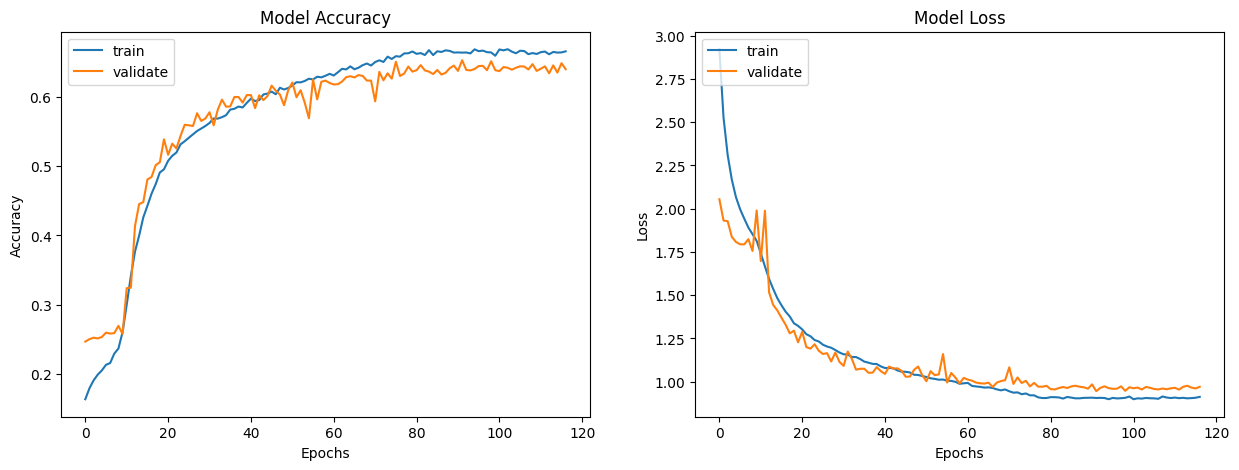

In [26]:
plot_model_history(base_cnn_history)

In [27]:
evaluate_model(base_cnn_model, train_generator, test_generator)

225/225 [==============================] - 16s 70ms/step - loss: 0.9522 - accuracy: 0.6559
final train accuracy = 72.39 , validation accuracy = 65.59


225/225 [==============================] - 5s 21ms/step


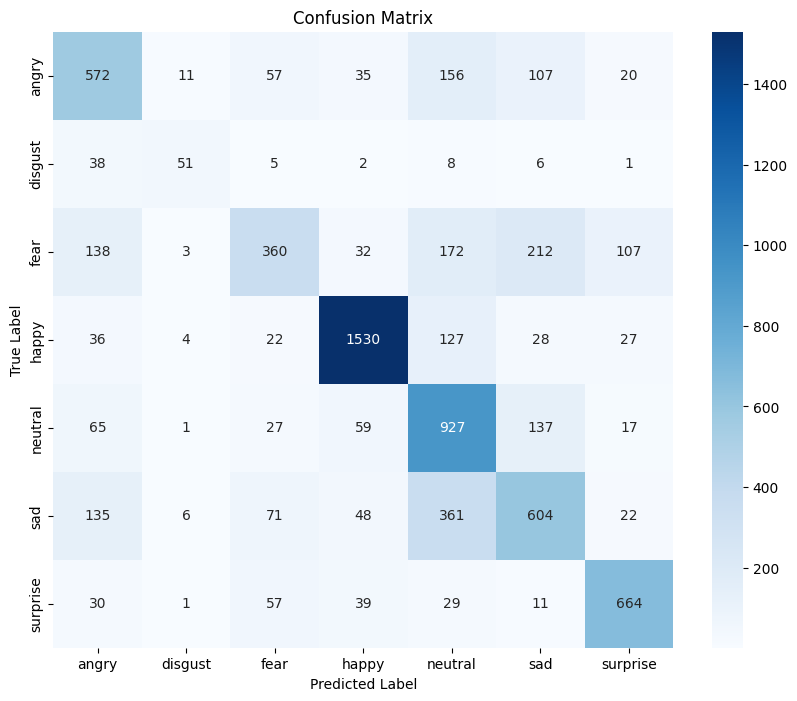

In [28]:
plot_confusion_matrix(base_cnn_model, test_generator)

In [29]:
print_classification_report(base_cnn_model, test_generator)

225/225 [==============================] - 5s 21ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.56      0.60      0.58       958
     disgust       0.66      0.46      0.54       111
        fear       0.60      0.35      0.44      1024
       happy       0.88      0.86      0.87      1774
     neutral       0.52      0.75      0.62      1233
         sad       0.55      0.48      0.51      1247
    surprise       0.77      0.80      0.79       831

    accuracy                           0.66      7178
   macro avg       0.65      0.62      0.62      7178
weighted avg       0.66      0.66      0.65      7178



In [31]:
# Model Save Path
saved_model = os.path.join(model_path, "saved_models")

base_cnn_model.save(os.path.join(saved_model, "Base_CNN.h5"))

### 7.2.2 VGG Model

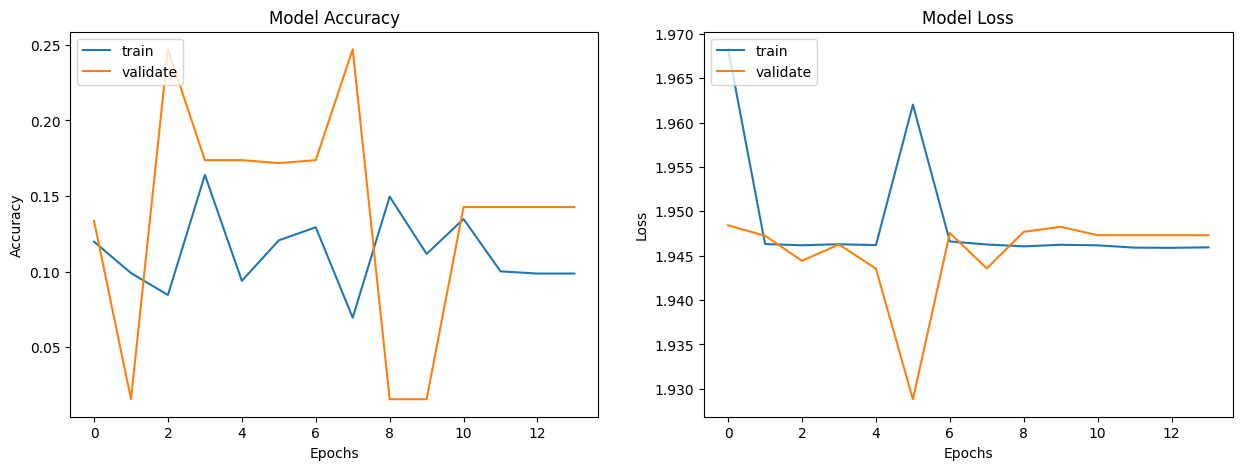

In [31]:
plot_model_history(base_vgg_history)

In [32]:
evaluate_model(base_vgg_model, train_generator, test_generator)

113/113 [==============================] - 28s 246ms/step - loss: 1.9288 - accuracy: 0.1718
final train accuracy = 17.29 , validation accuracy = 17.18


113/113 [==============================] - 25s 225ms/step


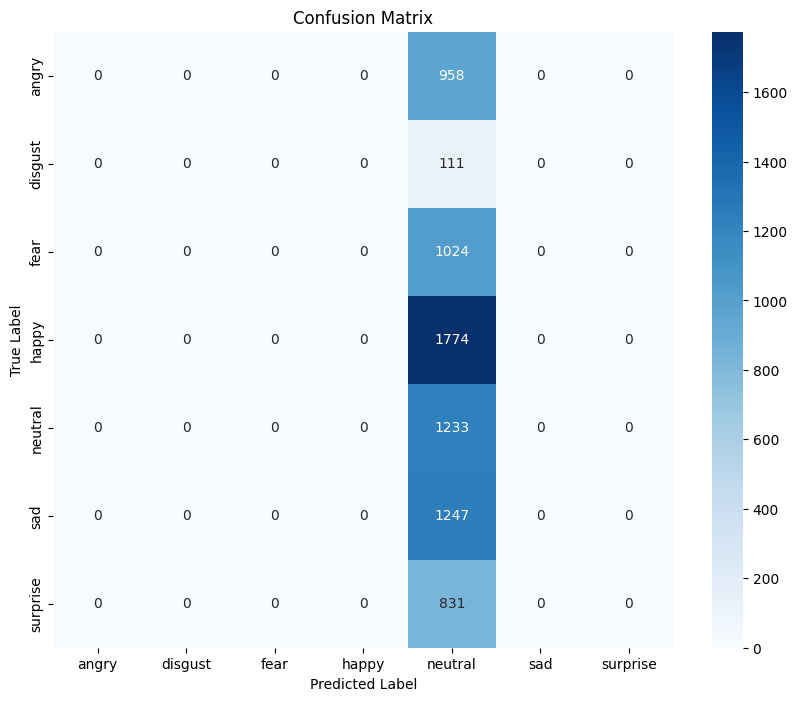

In [33]:
plot_confusion_matrix(base_vgg_model, test_generator)

In [34]:
print_classification_report(base_vgg_model, test_generator)

113/113 [==============================] - 21s 189ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
     disgust       0.00      0.00      0.00       111
        fear       0.00      0.00      0.00      1024
       happy       0.00      0.00      0.00      1774
     neutral       0.17      1.00      0.29      1233
         sad       0.00      0.00      0.00      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.17      7178
   macro avg       0.02      0.14      0.04      7178
weighted avg       0.03      0.17      0.05      7178



### 7.2.3 ResNet Model

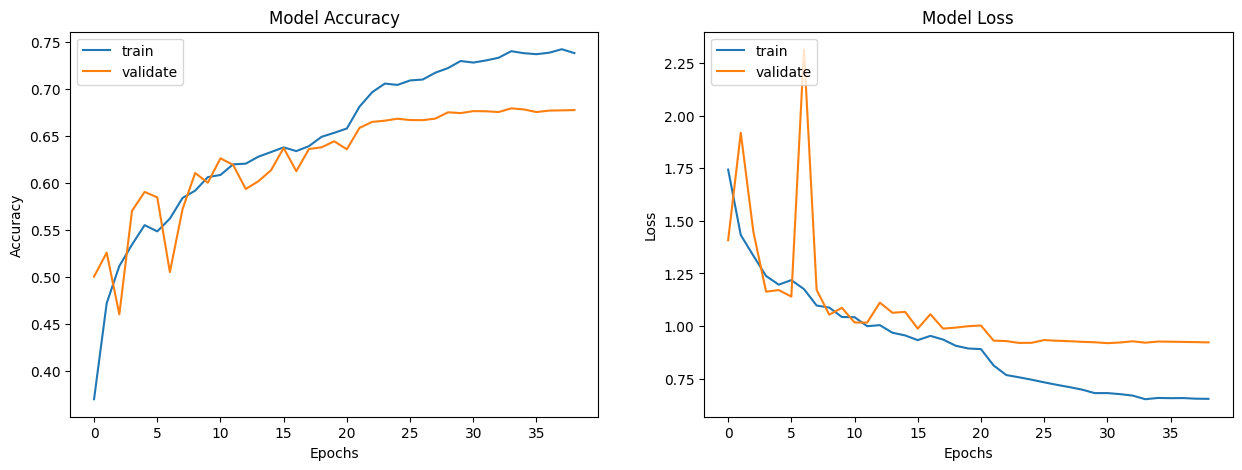

In [32]:
plot_model_history(base_res_history)

In [33]:
evaluate_model(ResNet50V2_Model, train_generator, test_generator)

113/113 [==============================] - 13s 110ms/step - loss: 0.9198 - accuracy: 0.6793
final train accuracy = 75.66 , validation accuracy = 67.93


113/113 [==============================] - 13s 107ms/step


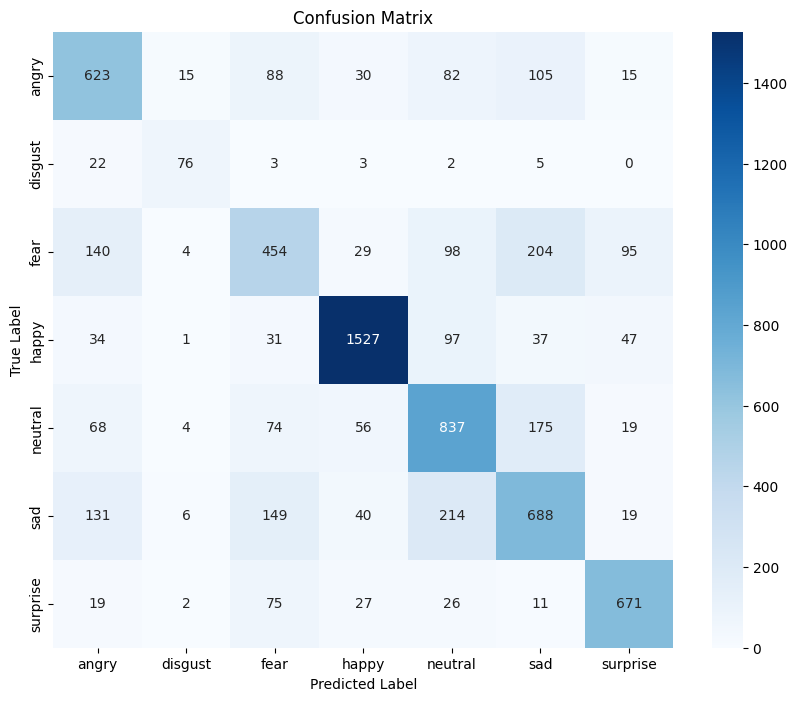

In [34]:
plot_confusion_matrix(ResNet50V2_Model, test_generator)

In [36]:
print_classification_report(ResNet50V2_Model, test_generator)

113/113 [==============================] - 12s 108ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.60      0.65      0.62       958
     disgust       0.70      0.68      0.69       111
        fear       0.52      0.44      0.48      1024
       happy       0.89      0.86      0.88      1774
     neutral       0.62      0.68      0.65      1233
         sad       0.56      0.55      0.56      1247
    surprise       0.77      0.81      0.79       831

    accuracy                           0.68      7178
   macro avg       0.67      0.67      0.67      7178
weighted avg       0.68      0.68      0.68      7178



In [50]:
# Model Save Path
saved_model = os.path.join(model_path, "saved_models")

res_model.save(os.path.join(saved_model, "ResNet_Transfer_Learning.h5"))

## 7.2 Tuned Models

### 7.2.1 Tuned CNN Model

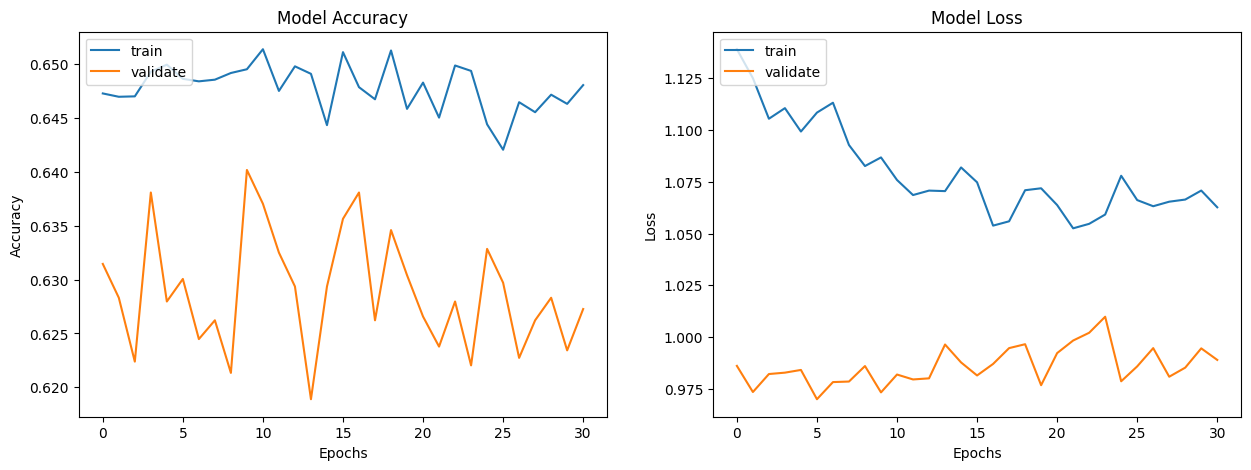

In [30]:
plot_model_history(tuned_cnn_history)

In [34]:
evaluate_model(tuned_cnn_model, train_generator, test_generator)

225/225 [==============================] - 5s 21ms/step - loss: 0.9481 - accuracy: 0.6573
final train accuracy = 69.34 , validation accuracy = 65.73


225/225 [==============================] - 5s 22ms/step


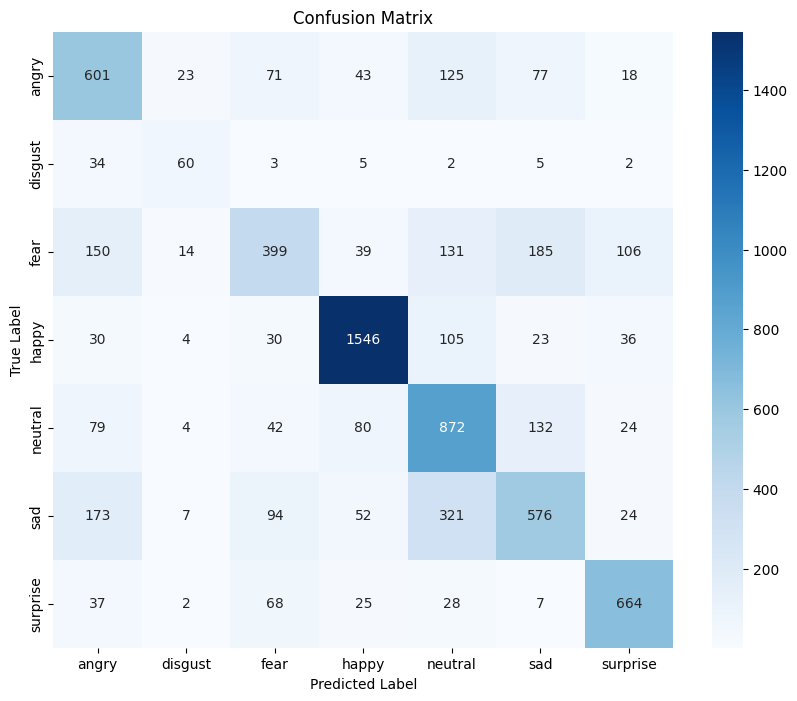

In [35]:
plot_confusion_matrix(tuned_cnn_model, test_generator)

In [36]:
print_classification_report(tuned_cnn_model, test_generator)

225/225 [==============================] - 5s 21ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.54      0.63      0.58       958
     disgust       0.53      0.54      0.53       111
        fear       0.56      0.39      0.46      1024
       happy       0.86      0.87      0.87      1774
     neutral       0.55      0.71      0.62      1233
         sad       0.57      0.46      0.51      1247
    surprise       0.76      0.80      0.78       831

    accuracy                           0.66      7178
   macro avg       0.63      0.63      0.62      7178
weighted avg       0.66      0.66      0.65      7178



In [39]:
# Model Save Path
saved_model = os.path.join(model_path, "saved_models")

tuned_cnn_model.save(os.path.join(saved_model, "Tuned_CNN.h5"))

### 7.2.2 Tuned VGG Model

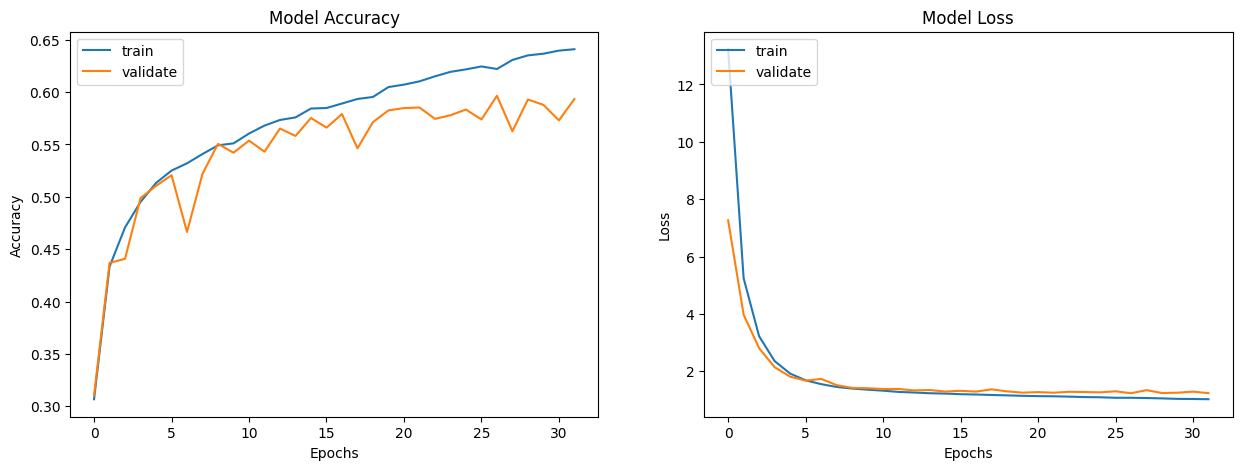

In [65]:
plot_model_history(vgg_history)

In [66]:
evaluate_model(vgg_model, train_generator, test_generator)

113/113 [==============================] - 29s 257ms/step - loss: 1.2334 - accuracy: 0.5964
final train accuracy = 64.93 , validation accuracy = 59.64


113/113 [==============================] - 25s 216ms/step


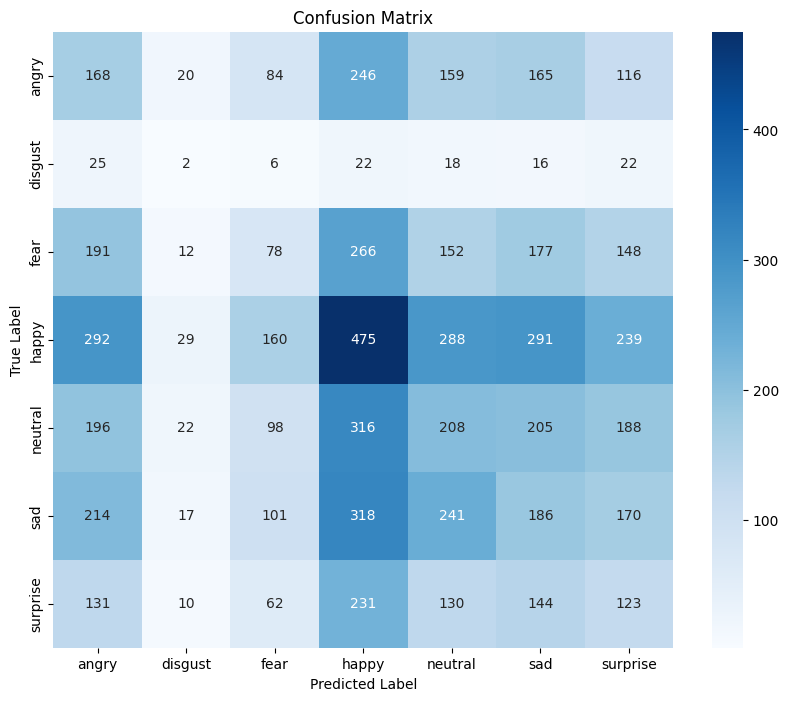

In [67]:
plot_confusion_matrix(vgg_model, test_generator)

In [69]:
print_classification_report(vgg_model, test_generator)

113/113 [==============================] - 26s 232ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.13      0.16      0.14       958
     disgust       0.01      0.01      0.01       111
        fear       0.15      0.08      0.11      1024
       happy       0.26      0.27      0.27      1774
     neutral       0.18      0.18      0.18      1233
         sad       0.16      0.15      0.16      1247
    surprise       0.10      0.13      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [70]:
# Model Save Path
saved_model = os.path.join(model_path, "saved_models")

vgg_model.save(os.path.join(saved_model, "VGG19_Transfer_Learning.h5"))

### 7.2.3 Tuned ResNet Model

#### 7.2.3.1 Keras Tuner

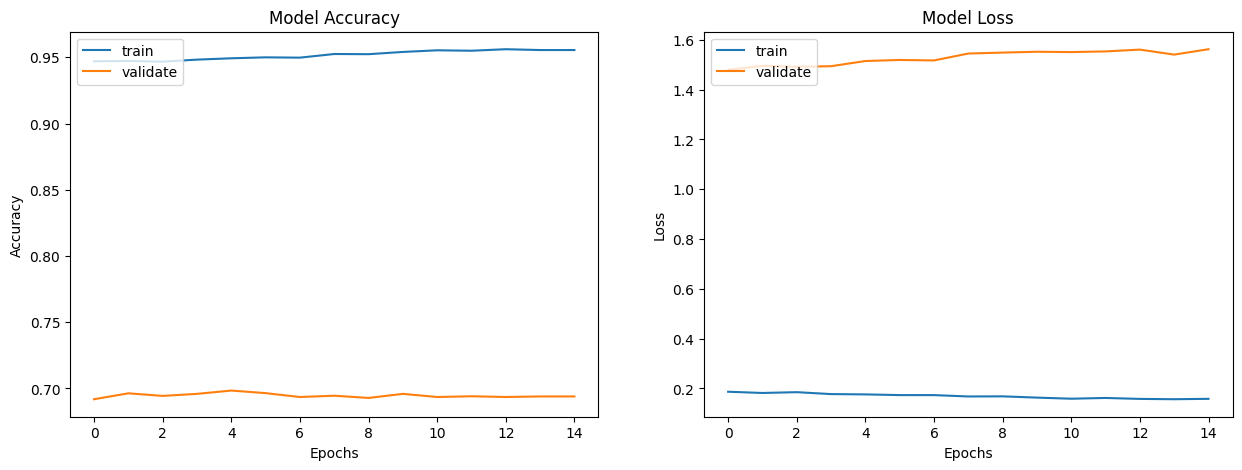

In [80]:
plot_model_history(best_resnet_history)

#### 7.2.3.2 Custom Fine Tuning 1

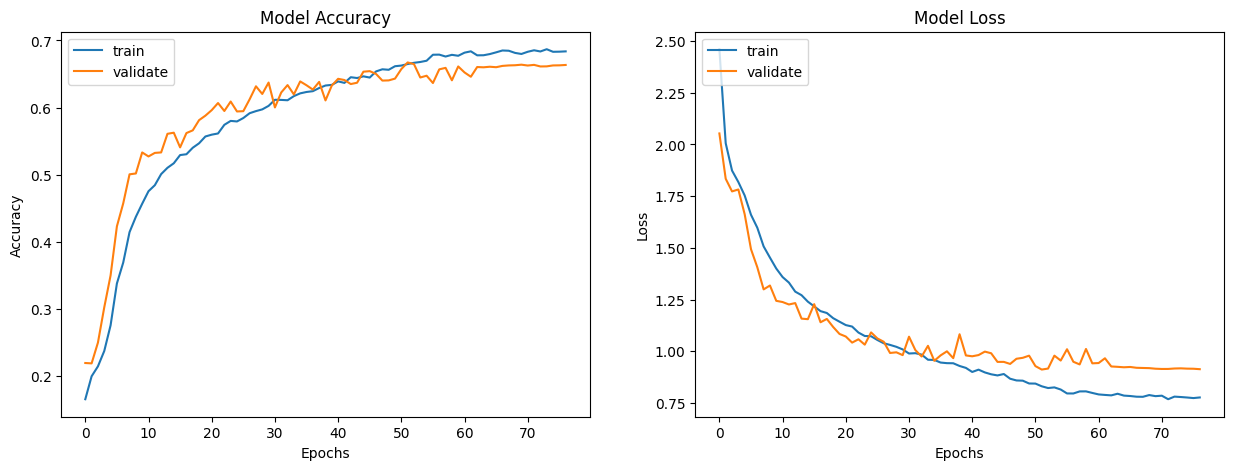

In [36]:
plot_model_history(tuned_res_history)

In [33]:
evaluate_model(tuned_res_model, train_generator, test_generator)

113/113 [==============================] - 19s 163ms/step - loss: 0.9117 - accuracy: 0.6672
final train accuracy = 67.85 , validation accuracy = 66.72


113/113 [==============================] - 18s 150ms/step


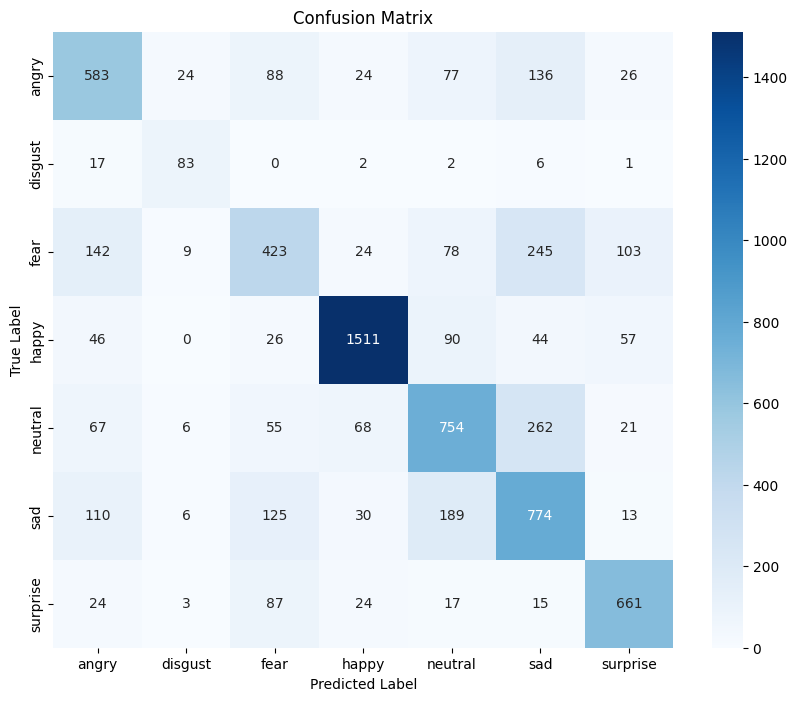

In [34]:
plot_confusion_matrix(tuned_res_model, test_generator)

In [35]:
print_classification_report(tuned_res_model, test_generator)

113/113 [==============================] - 18s 155ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.59      0.61      0.60       958
     disgust       0.63      0.75      0.69       111
        fear       0.53      0.41      0.46      1024
       happy       0.90      0.85      0.87      1774
     neutral       0.62      0.61      0.62      1233
         sad       0.52      0.62      0.57      1247
    surprise       0.75      0.80      0.77       831

    accuracy                           0.67      7178
   macro avg       0.65      0.66      0.65      7178
weighted avg       0.67      0.67      0.67      7178



In [37]:
# Model Save Path
saved_model = os.path.join(model_path, "saved_models")

tuned_res_model.save(os.path.join(saved_model, "Tuned_ResNet_Model.h5"))

In [50]:
evaluate_model(res_model, train_generator, test_generator)

225/225 [==============================] - 11s 49ms/step - loss: 0.9499 - accuracy: 0.6807
final train accuracy = 75.60 , validation accuracy = 68.07


# 8.0 REAL-TIME PREDICTIONS

In [1]:
import pickle
import cv2
import tensorflow as tf
import numpy as np

In [2]:
emotions_dict = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

# Define Path
dict_path = "category_map.pkl"

# Write the Dictionary 
with open(dict_path, "wb") as f:
    pickle.dump(emotions_dict, f)

print(f'Dictionary exported to: {dict_path}')

Dictionary exported to: category_map.pkl


In [3]:
# Create a reverse dictionary for lookup
reverse_emotions_dict = {v: k for k, v in emotions_dict.items()}

In [4]:
# File paths
xml_path = "haarcascade_frontalface_default.xml"
model_path = "models/ResNet/saved_models/Tuned_ResNet_Model.h5"
dict_path = "category_map.pkl"

# Font settings for annotations
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + xml_path)

In [5]:
# Initialize OpenCV with Qt Backend
cv2.startWindowThread()

# Load the label dictionary from the file
with open(dict_path, 'rb') as f:
    my_dict = pickle.load(f)
print("Dictionary imported successfully:", my_dict)

# Load the pre-trained model
model = tf.keras.models.load_model(model_path)

# Initialize webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Failed to open webcam.")
    exit()

# Start video capture
while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        print(ret)
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray)

    for x, y, w, h in faces:
        # Extract the region of interest (ROI)
        roi_color = frame[y:y + h, x:x + w]
        roi_color_resized = cv2.resize(roi_color, (224, 224))

        # Normalize the image
        final_img = np.expand_dims(roi_color_resized, axis=0) / 255.0

        # Predict the label using the model
        predictions = model.predict(final_img)
        index = np.argmax(predictions)
        label = reverse_emotions_dict.get(index, "Unknown")

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)

        # Add the predicted label as text above the rectangle
        cv2.putText(
            img=frame, 
            text=label, 
            org=(x, y - 10), 
            fontFace=font, 
            fontScale=font_scale, 
            color=(125, 246, 55), 
            thickness=3
        )

    # Display the frame
    cv2.imshow("Emotion Detection", frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

Dictionary imported successfully: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
1/1 [==============================] - 0s 23ms/step
